In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## This notebook visualized the experiment of testing the optimality of the preconditioner. Due to the problem size every regularization parameter is run as a single script. Upload the data and assign the mu value to it. Then use the plot function as in the following

In [2]:
df1 = pd.read_csv("results_P_optimality_test_mu_1e-06_thesis.csv"); mu1 = '1e-6'; 
df2 = pd.read_csv("results_P_optimality_test_mu_1e-05_thesis.csv"); mu2 = '1e-5'; 
df3 = pd.read_csv("results_P_optimality_test_mu_1e-04_thesis.csv"); mu3 = '1e-4'; 
df4 = pd.read_csv("results_P_optimality_test_mu_1e-07_thesis.csv"); mu4 = '1e-7'; 
df5 = pd.read_csv("results_P_optimality_test_mu_1e-08_thesis.csv"); mu5 = '1e-8'; 


In [3]:

def plot_eit_analysis_multi(data_mu_pairs, matrix_dim_idx=0):
    """
    Plots CG iterations and approximate rank with error bands for multiple datasets,
    and matrix dimension for one dataset.
    
    Parameters:
    - data_mu_pairs: List of tuples (df, mu_label)
    - matrix_dim_idx: Index of the dataset to use for matrix dimension plot
    """
    fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

    for df, mu_label in data_mu_pairs:
        df_sorted = df.sort_values(by='mesh_size', ascending=False)
        x = df_sorted['mesh_size']
        y = df_sorted['mean_cg_it']
        yerr = df_sorted['std_cg_it']
        axs[0].plot(x, y, label=f'CG iters (μ={mu_label})')
        axs[0].fill_between(x, y - yerr, y + yerr, alpha=0.2)
    axs[0].set_ylabel('Mean CG Iterations')
    axs[0].set_title('CG Iterations vs. Mesh Size (h)')
    axs[0].grid(True)
    axs[0].legend()

    for df, mu_label in data_mu_pairs:
        df_sorted = df.sort_values(by='mesh_size', ascending=False)
        x = df_sorted['mesh_size']
        y = df_sorted['mean_approx_rank']
        yerr = df_sorted['std_approx_rank']
        axs[1].plot(x, y, label=f'Approx. Rank (μ={mu_label})')
        axs[1].fill_between(x, y - yerr, y + yerr, alpha=0.2)
    axs[1].set_ylabel('Mean Approx. Rank')
    axs[1].set_title('Approximate Rank vs. Mesh Size (h)')
    axs[1].grid(True)
    axs[1].legend()

    df_dim = data_mu_pairs[matrix_dim_idx][0].sort_values(by='mesh_size', ascending=False)
    mu_dim = data_mu_pairs[matrix_dim_idx][1]
    axs[2].plot(df_dim['mesh_size'], df_dim['matrix_dim'],
                '-^', label=f'Matrix Dimension ', color='orange')
    axs[2].set_xlabel('Mesh Size (h)')
    axs[2].set_ylabel('Matrix Dimension')
    axs[2].set_title(f'Matrix Dimension w.r.t Mesh Size')
    axs[2].grid(True)
    axs[2].legend()

    # Invert X-axis
    for ax in axs:
        ax.invert_xaxis()

    plt.tight_layout()
    plt.show()


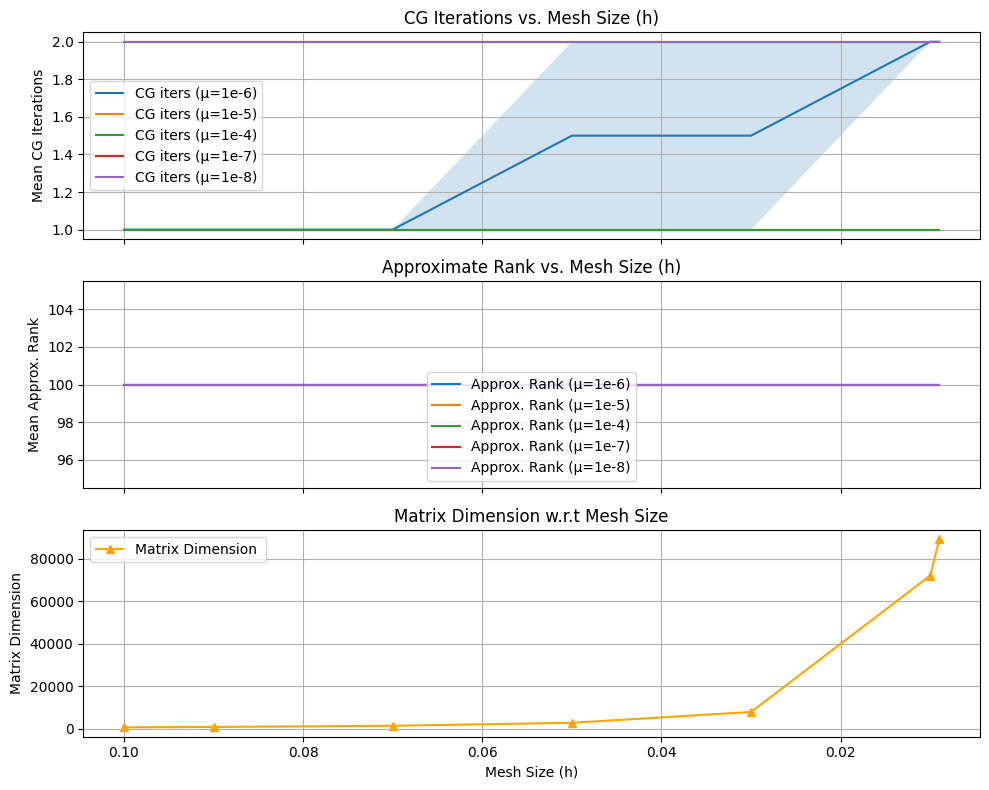

In [4]:
plot_eit_analysis_multi([
    (df1, mu1),
    (df2, mu2),
    (df3, mu3),
    (df4, mu4),
    (df5, mu5)
], matrix_dim_idx=0)